<a href="https://colab.research.google.com/github/brunod02/Analisis-evasi-n-clientes-parte2/blob/main/TelecomX_LATAM_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
datos = pd.read_csv('/content/datos_tratados.csv')
datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuenta_diaria
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [ ]:
datos = datos.drop(columns=['customerID'])

In [ ]:
datos.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuenta_diaria
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [ ]:
X = datos.drop(columns=['Churn']) #X variables explicativas
y = datos['Churn']                #y variable de respuesta

In [ ]:
variables_categoricas = [
    "customer.gender",
    "customer.SeniorCitizen",
    "customer.Partner",
    "customer.Dependents",
    "phone.PhoneService",
    "phone.MultipleLines",
    "internet.InternetService",
    "internet.OnlineSecurity",
    "internet.DeviceProtection",
    "internet.TechSupport",
    "internet.StreamingTV",
    "internet.StreamingMovies",
    "account.Contract",
    "account.PaperlessBilling",
    "account.PaymentMethod"
]

In [ ]:
variables_numericas = [
    "customer.tenure",
    "account.Charges.Monthly",
    "account.Charges.Total",
    "Cuentas_Diarias"
]

# Transformación de las variables y encoding

In [ ]:
X.head()

,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuenta_diaria
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [ ]:
columnas = X.columns

In [ ]:
onehot = make_column_transformer((OneHotEncoder(drop='if_binary'),
 ['customer.gender', 'customer.Partner', 'phone.PhoneService',	'phone.MultipleLines',
  'internet.InternetService',	'internet.OnlineSecurity',
  'internet.OnlineBackup'	,'internet.DeviceProtection',
  'internet.TechSupport'	,'internet.StreamingTV',	'internet.StreamingMovies',
  'account.Contract'	,'account.PaperlessBilling',	'account.PaymentMethod'  ]),
  remainder='passthrough', sparse_threshold=0, force_int_remainder_cols=False)

In [ ]:
X = onehot.fit_transform(X)

In [ ]:
onehot.get_feature_names_out(columnas)

array(['onehotencoder__customer.gender_Male',
       'onehotencoder__customer.Partner_Yes',
       'onehotencoder__phone.PhoneService_Yes',
       'onehotencoder__phone.MultipleLines_No',
       'onehotencoder__phone.MultipleLines_No phone service',
       'onehotencoder__phone.MultipleLines_Yes',
       'onehotencoder__internet.InternetService_DSL',
       'onehotencoder__internet.InternetService_Fiber optic',
       'onehotencoder__internet.InternetService_No',
       'onehotencoder__internet.OnlineSecurity_No',
       'onehotencoder__internet.OnlineSecurity_No internet service',
       'onehotencoder__internet.OnlineSecurity_Yes',
       'onehotencoder__internet.OnlineBackup_No',
       'onehotencoder__internet.OnlineBackup_No internet service',
       'onehotencoder__internet.OnlineBackup_Yes',
       'onehotencoder__internet.DeviceProtection_No',
       'onehotencoder__internet.DeviceProtection_No internet service',
       'onehotencoder__internet.DeviceProtection_Yes',
       'on

In [ ]:
pd.DataFrame(X, columns=onehot.get_feature_names_out(columnas))

,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_Yes,onehotencoder__phone.PhoneService_Yes,onehotencoder__phone.MultipleLines_No,onehotencoder__phone.MultipleLines_No phone service,onehotencoder__phone.MultipleLines_Yes,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,onehotencoder__internet.OnlineSecurity_No,...,onehotencoder__account.PaymentMethod_Bank transfer (automatic),onehotencoder__account.PaymentMethod_Credit card (automatic),onehotencoder__account.PaymentMethod_Electronic check,onehotencoder__account.PaymentMethod_Mailed check,remainder__customer.SeniorCitizen,remainder__customer.Dependents,remainder__customer.tenure,remainder__account.Charges.Monthly,remainder__account.Charges.Total,remainder__cuenta_diaria
0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0,Yes,9,65.6,593.3,2.186667
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0,No,9,59.9,542.4,1.996667
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0,No,4,73.9,280.85,2.463333
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1,No,13,98.0,1237.85,3.266667
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1,No,3,83.9,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,No,13,55.15,742.9,1.838333
7039,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0,No,22,85.1,1873.7,2.836667
7040,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0,No,2,50.3,92.75,1.676667
7041,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,Yes,67,67.85,4627.65,2.261667


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [ ]:
y = pd.DataFrame(y, columns=['Churn'])
y

,Churn
0,0
1,0
2,1
3,1
4,1
...,...
7038,0
7039,1
7040,0
7041,0


In [ ]:
X = pd.DataFrame(X, columns=onehot.get_feature_names_out(columnas))
X

,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_Yes,onehotencoder__phone.PhoneService_Yes,onehotencoder__phone.MultipleLines_No,onehotencoder__phone.MultipleLines_No phone service,onehotencoder__phone.MultipleLines_Yes,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,onehotencoder__internet.OnlineSecurity_No,...,onehotencoder__account.PaymentMethod_Bank transfer (automatic),onehotencoder__account.PaymentMethod_Credit card (automatic),onehotencoder__account.PaymentMethod_Electronic check,onehotencoder__account.PaymentMethod_Mailed check,remainder__customer.SeniorCitizen,remainder__customer.Dependents,remainder__customer.tenure,remainder__account.Charges.Monthly,remainder__account.Charges.Total,remainder__cuenta_diaria
0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0,Yes,9,65.6,593.3,2.186667
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0,No,9,59.9,542.4,1.996667
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0,No,4,73.9,280.85,2.463333
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1,No,13,98.0,1237.85,3.266667
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1,No,3,83.9,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,No,13,55.15,742.9,1.838333
7039,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0,No,22,85.1,1873.7,2.836667
7040,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0,No,2,50.3,92.75,1.676667
7041,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,Yes,67,67.85,4627.65,2.261667


# Verificación de la Proporción de Cancelación (Churn)

In [ ]:
y.value_counts(normalize=True)*100

,proportion
Churn,
0,73.463013
1,26.536987


In [ ]:
X['remainder__customer.Dependents'] = X['remainder__customer.Dependents'].replace({'No': 0, 'Yes': 1})

In [ ]:
X.head()

,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_Yes,onehotencoder__phone.PhoneService_Yes,onehotencoder__phone.MultipleLines_No,onehotencoder__phone.MultipleLines_No phone service,onehotencoder__phone.MultipleLines_Yes,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,onehotencoder__internet.OnlineSecurity_No,...,onehotencoder__account.PaymentMethod_Bank transfer (automatic),onehotencoder__account.PaymentMethod_Credit card (automatic),onehotencoder__account.PaymentMethod_Electronic check,onehotencoder__account.PaymentMethod_Mailed check,remainder__customer.SeniorCitizen,remainder__customer.Dependents,remainder__customer.tenure,remainder__account.Charges.Monthly,remainder__account.Charges.Total,remainder__cuenta_diaria
0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0,1,9,65.6,593.3,2.186667
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0,0,9,59.9,542.4,1.996667
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0,0,4,73.9,280.85,2.463333
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1,0,13,98.0,1237.85,3.266667
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1,0,3,83.9,267.4,2.796667


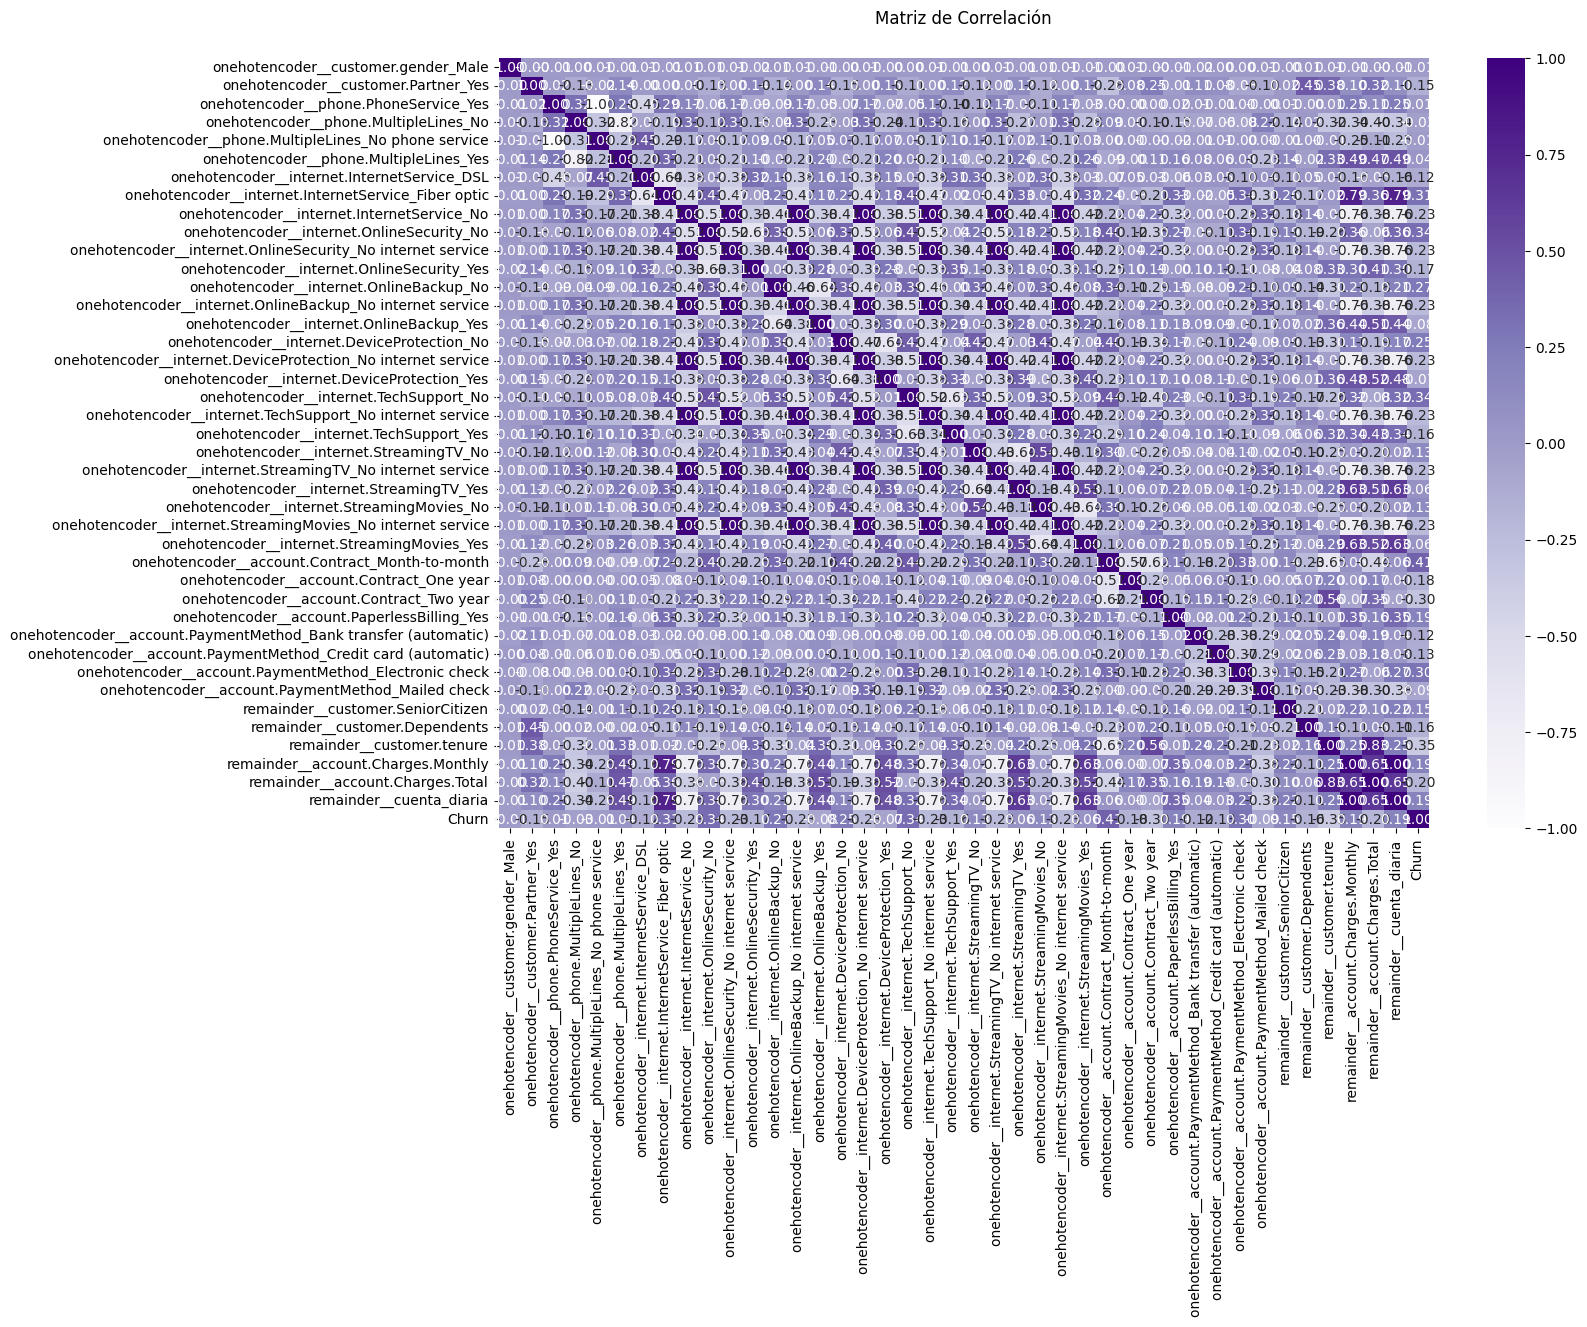

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(pd.concat([X, y], axis = 1).corr(), cmap='Purples', annot = True, fmt = ".2f")
plt.title("Matriz de Correlación", pad= 25)
plt.show()

In [ ]:
pd.concat([X, y], axis=1).corr()['Churn'].sort_values(ascending=False)

,Churn
Churn,1.000000
onehotencoder__account.Contract_Month-to-month,0.405103
onehotencoder__internet.OnlineSecurity_No,0.342637
onehotencoder__internet.TechSupport_No,0.337281
onehotencoder__internet.InternetService_Fiber optic,0.308020
onehotencoder__account.PaymentMethod_Electronic check,0.301919
onehotencoder__internet.OnlineBackup_No,0.268005
onehotencoder__internet.DeviceProtection_No,0.252481
remainder__account.Charges.Monthly,0.193356
remainder__cuenta_diaria,0.193356


# Analisis Dirigido

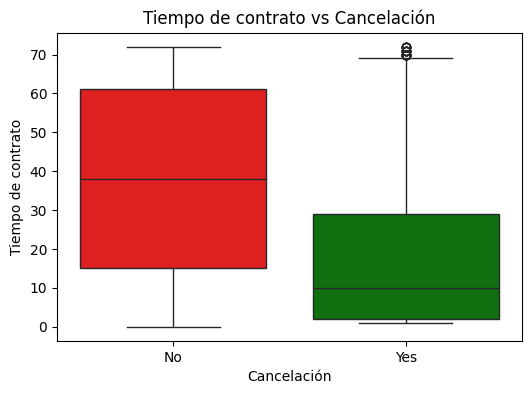

In [ ]:
plt.figure(figsize = (6,4))
sns.boxplot(data = datos, x = datos['Churn'],
            y = 'customer.tenure',
            hue = datos['Churn'],
            palette = ['red', 'green'],
            )


plt.title('Tiempo de contrato vs Cancelación')
plt.xlabel('Cancelación')
plt.ylabel('Tiempo de contrato')
plt.show()

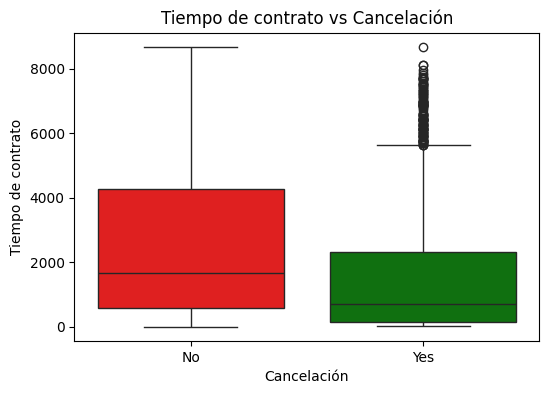

In [ ]:
plt.figure(figsize = (6,4))
sns.boxplot(data = datos, x = datos['Churn'],
            y = 'account.Charges.Total',
            hue = datos['Churn'],
            palette = ['red', 'green'],
            )


plt.title('Tiempo de contrato vs Cancelación')
plt.xlabel('Cancelación')
plt.ylabel('Tiempo de contrato')
plt.show()

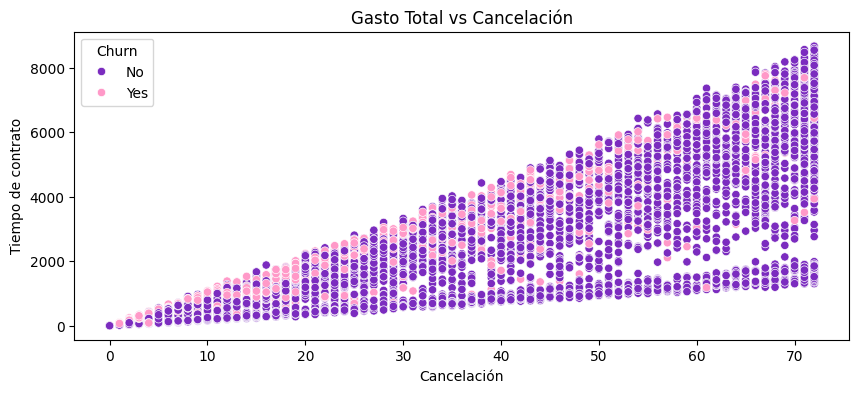

In [ ]:
plt.figure(figsize = (10,4))
sns.scatterplot(data = datos, x = 'customer.tenure',
            y = 'account.Charges.Total',
            hue = datos['Churn'],
            palette = ['#7b2cbf', '#ff99c8'],
            )
plt.title('Gasto Total vs Cancelación')
plt.xlabel('Cancelación')
plt.ylabel('Tiempo de contrato')
plt.show()

# Separación de datos de prueba y entrenamiento

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y , random_state=42)

# Modelo de refencia con Dummy

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.7348097671777399

In [ ]:
print(classification_report(y_test, dummy.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1294
           1       0.00      0.00      0.00       467

    accuracy                           0.73      1761
   macro avg       0.37      0.50      0.42      1761
weighted avg       0.54      0.73      0.62      1761



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


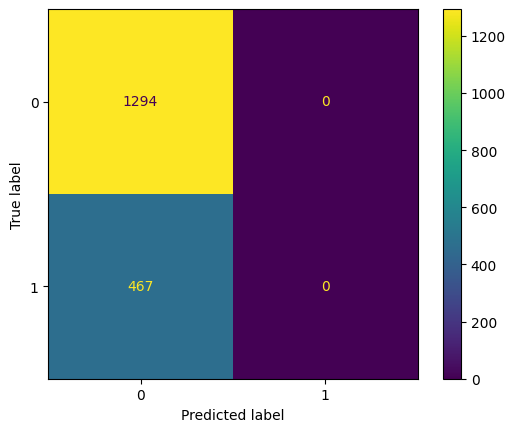

In [ ]:
y_pred_dummy = dummy.predict(X_test)

cm = confusion_matrix(y_test, y_pred_dummy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dummy.classes_)
disp.plot();

# Arbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [ ]:
modelo_arbol = DecisionTreeClassifier(random_state=42, max_depth=5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
modelo_arbol.score(X_test, y_test)

0.7881885292447472

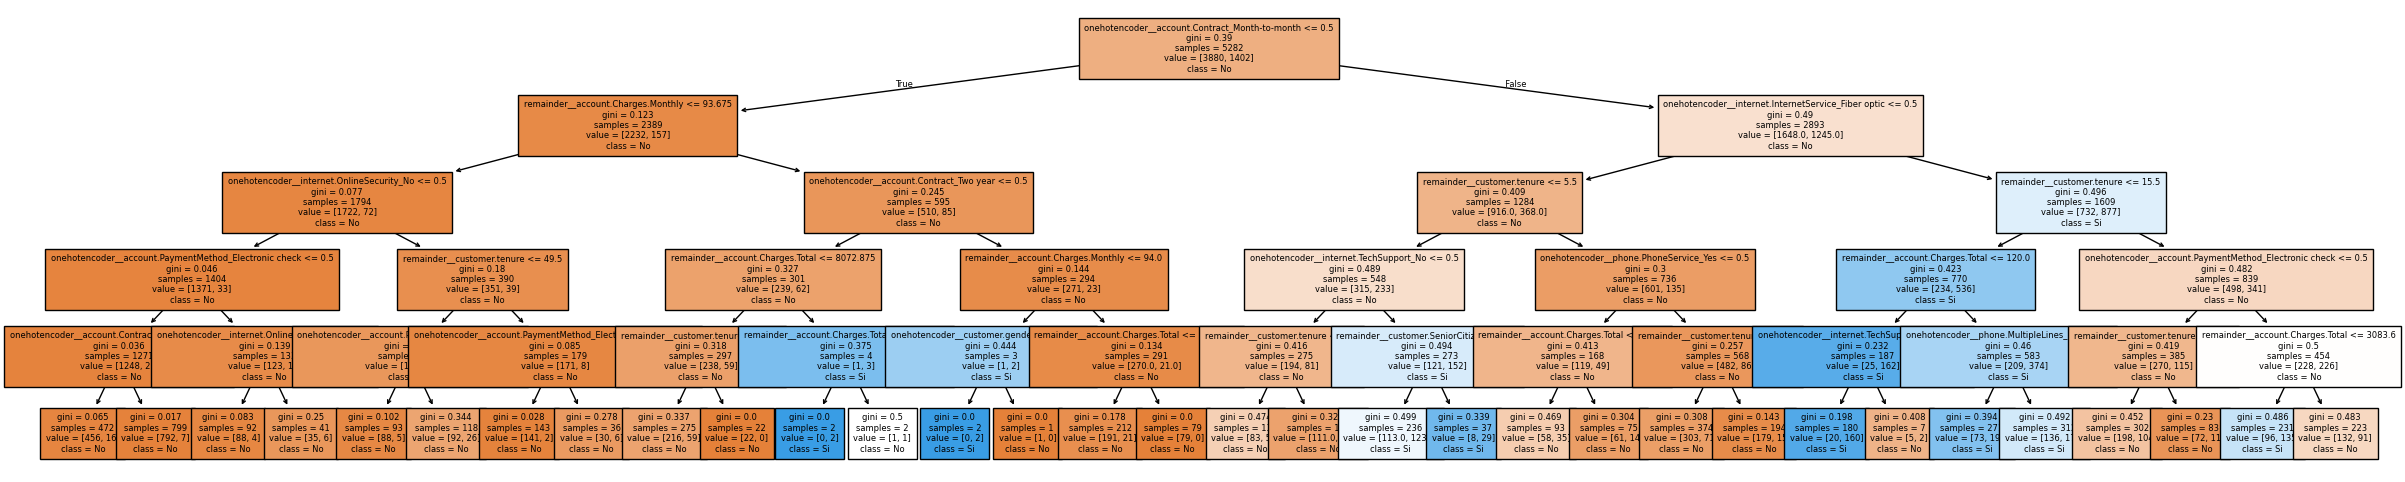

In [ ]:
plt.figure(figsize=(30,6))
plot_tree(modelo_arbol, filled=True, class_names=['No', 'Si'], fontsize=6, feature_names=X.columns)
plt.show()

In [ ]:
y_arbol_decision = modelo_arbol.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_arbol_decision))

Accuracy: 0.7881885292447472


In [ ]:
print(classification_report(y_test, y_arbol_decision))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1294
           1       0.61      0.57      0.59       467

    accuracy                           0.79      1761
   macro avg       0.73      0.72      0.72      1761
weighted avg       0.78      0.79      0.79      1761



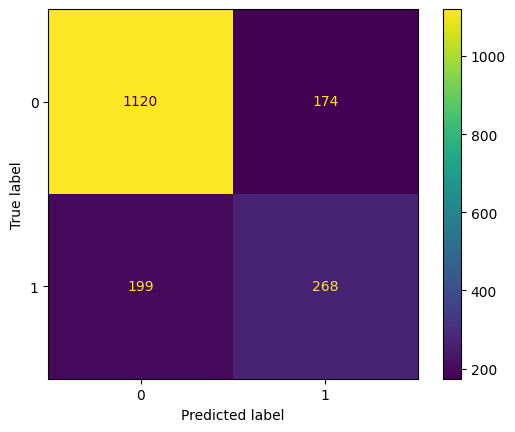

In [ ]:
cm = confusion_matrix(y_test, y_arbol_decision)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_arbol.classes_)
disp.plot();

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelo_random_forest = RandomForestClassifier(n_estimators = 300,
                                       max_depth = 5,
                                       min_samples_split = 2,
                                       min_samples_leaf = 1,
                                       random_state = 5,
                                       n_jobs = -1)
modelo_random_forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=5, n_estimators=300, n_jobs=-1, random_state=5)

In [ ]:
modelo_random_forest.score(X_test, y_test)
y_rf = modelo_random_forest.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_rf))

Accuracy: 0.7876206700738216


In [ ]:
importances = modelo_random_forest.feature_importances_

In [ ]:
feature_importances = pd.DataFrame({'Features': X.columns,'importances': ((importances)*100).round(2)})
feature_importances.sort_values('importances', ascending=False)

,Features,importances
27,onehotencoder__account.Contract_Month-to-month,16.66
37,remainder__customer.tenure,14.88
39,remainder__account.Charges.Total,8.98
18,onehotencoder__internet.TechSupport_No,7.88
9,onehotencoder__internet.OnlineSecurity_No,6.64
7,onehotencoder__internet.InternetService_Fiber ...,6.39
29,onehotencoder__account.Contract_Two year,5.74
33,onehotencoder__account.PaymentMethod_Electroni...,4.85
40,remainder__cuenta_diaria,3.94
38,remainder__account.Charges.Monthly,3.34


In [ ]:
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1294
           1       0.65      0.44      0.52       467

    accuracy                           0.79      1761
   macro avg       0.73      0.68      0.69      1761
weighted avg       0.77      0.79      0.77      1761



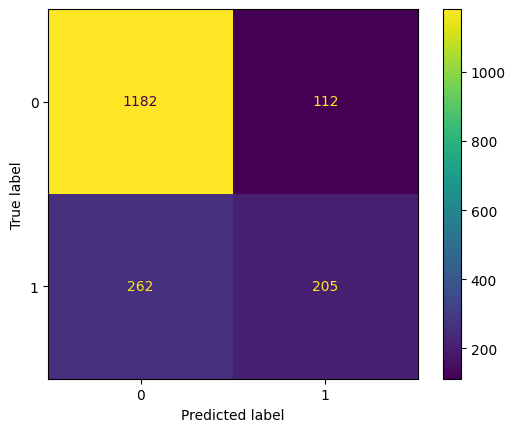

In [ ]:
cm = confusion_matrix(y_test, y_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_arbol.classes_)
disp.plot();

# Normalización de los datos

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
normalización = MinMaxScaler()
X_train_normalizada = normalización.fit_transform(X_train)

In [ ]:
pd.DataFrame(X_train_normalizada)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.625000,0.772795,0.513155,0.772795
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.013889,0.510214,0.008014,0.510214
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.847222,0.678127,0.595903,0.678127
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.888889,0.869457,0.794848,0.869457
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.013889,0.561036,0.008601,0.561036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.555556,0.625810,0.379088,0.625810
5278,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.722222,0.061286,0.153262,0.061286
5279,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.305556,0.023418,0.052085,0.023418
5280,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.333333,0.062780,0.065833,0.062780


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [239]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train_normalizada, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=30)

### Cómo determinar el valor adecuado de `n_neighbors`

La forma más común y efectiva para determinar el valor óptimo de `n_neighbors` (y otros hiperparámetros) es mediante la **búsqueda de hiperparámetros con validación cruzada**. Esto implica probar diferentes valores para `n_neighbors` y evaluar el rendimiento del modelo en cada caso utilizando un conjunto de validación.

Una herramienta muy útil para esto es `GridSearchCV` de `scikit-learn`, que explora sistemáticamente una combinación de hiperparámetros especificados y utiliza la validación cruzada para encontrar la mejor combinación.

In [242]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 31)}

knn_base = KNeighborsClassifier()

grid_search = GridSearchCV(knn_base, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_normalizada, y_train.values.ravel())

best_n_neighbors = grid_search.best_params_['n_neighbors']

print(f"El mejor valor de n_neighbors encontrado es: {best_n_neighbors}")

El mejor valor de n_neighbors encontrado es: 30
Rendimiento del KNN optimizado con n_neighbors=30: 0.7814


In [243]:
X_test_normalizada = normalización.transform(X_test)

In [244]:
knn.score(X_test_normalizada, y_test)

0.78137421919364

In [245]:
print(classification_report(y_test, knn.predict(X_test_normalizada)))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1294
           1       0.60      0.54      0.57       467

    accuracy                           0.78      1761
   macro avg       0.72      0.70      0.71      1761
weighted avg       0.77      0.78      0.78      1761



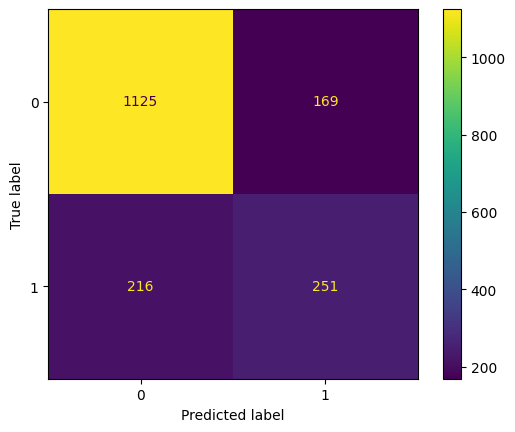

In [246]:
cm = confusion_matrix(y_test, knn.predict(X_test_normalizada))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot();

# Evaluación de los Modelos


In [247]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [248]:
modelos = [('Dummy', dummy, X_test),
           ('Arbol', modelo_arbol, X_test),
           ('RandomForest', modelo_random_forest, X_test),
           ('Knn', knn, X_test_normalizada)]

resultados = []

for nombre, modelo, X_data_for_model in modelos:
    # Predicciones
    y_pred = modelo.predict(X_data_for_model)
    y_proba = modelo.predict_proba(X_data_for_model)[:, 1]

    # Métricas
    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred, zero_division=0),
        "AUC": roc_auc_score(y_test, y_proba)
    })

In [249]:
df_resultados = pd.DataFrame(resultados)
df_resultados

,Modelo,Accuracy,Precision,Recall,F1-score,AUC
0,Dummy,0.734810,0.000000,0.000000,0.000000,0.500000
1,Arbol,0.788189,0.606335,0.573876,0.589659,0.829623
2,RandomForest,0.787621,0.646688,0.438972,0.522959,0.840215
3,Knn,0.781374,0.597619,0.537473,0.565953,0.819892


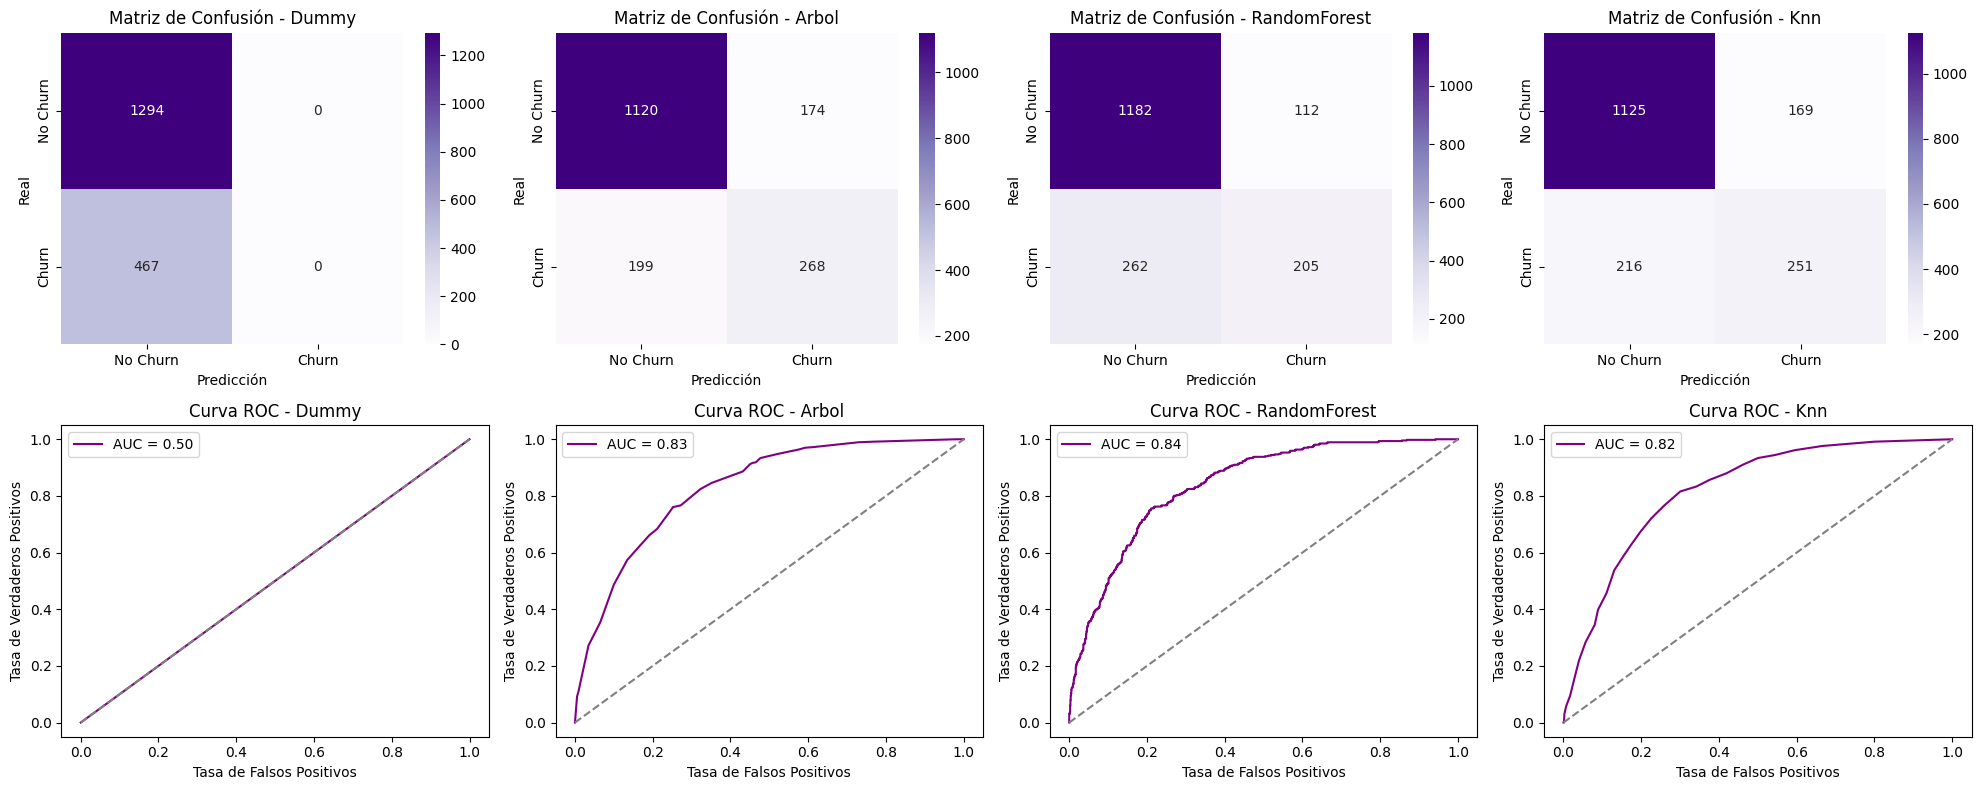

In [250]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

modelos = [('Dummy', dummy, X_test),
           ('Arbol', modelo_arbol, X_test),
           ('RandomForest', modelo_random_forest, X_test),
           ('Knn', knn, X_test_normalizada)]


# Crear figura con 2 filas y 4 columnas (una por cada modelo)
fig, axes = plt.subplots(2, len(modelos), figsize=(len(modelos)*5, 8))

# FILA 1: MATRICES DE CONFUSIÓN

for idx, (nombre, modelo, X_data_for_model) in enumerate(modelos):
    ax = axes[0, idx]  # fila 0, columna idx

    y_pred = modelo.predict(X_data_for_model)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'],
                ax=ax)

    ax.set_title(f'Matriz de Confusión - {nombre}')
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Real")


# FILA 2: CURVAS ROC

for idx, (nombre, modelo, X_data_for_model) in enumerate(modelos):
    ax = axes[1, idx]


    if hasattr(modelo, 'predict_proba'):
        y_proba = modelo.predict_proba(X_data_for_model)[:, 1]
    else:

        if hasattr(modelo, 'decision_function'):
            y_proba = modelo.decision_function(X_data_for_model)
        else:

            y_proba = modelo.predict(X_data_for_model)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    ax.plot(fpr, tpr, color='purple', label=f"AUC = {roc_auc:.2f}")
    ax.plot([0,1], [0,1], linestyle='--', color='gray')

    ax.set_title(f"Curva ROC - {nombre}")
    ax.set_xlabel("Tasa de Falsos Positivos")
    ax.set_ylabel("Tasa de Verdaderos Positivos")
    ax.legend()

plt.tight_layout()
plt.show()

1. Mejor desempeño:
El Árbol de Decisión (Arbol) tuvo el mejor desempeño general, con la Accuracy (0.7882), F1-score (0.5897) y AUC (0.8296) más altos.

2. Overfitting o Underfitting:
Underfitting: El Dummy Classifier sufrió claramente de underfitting. El KNN también mostró indicios de underfitting (o falta de optimización de hiperparámetros).
Overfitting: Los modelos Árbol de Decisión y Random Forest no mostraron signos evidentes de overfitting severo en el conjunto de prueba, gracias a las restricciones aplicadas (como max_depth en el árbol individual) y la naturaleza robusta del Random Forest.

## Análisis Crítico y Comparación

### **Informe de Predicción de Abandono de Clientes (Churn)**

**1. Objetivo**
El objetivo de este análisis fue predecir el abandono de clientes (`Churn`) utilizando un conjunto de datos que contiene diversas características demográficas, de servicio telefónico, de internet y de cuenta.

**2. Preparación de Datos**
*   Se cargaron los datos y se eliminó la columna `customerID`.
*   Se identificaron y procesaron las variables categóricas mediante `OneHotEncoder` y la variable objetivo `Churn` mediante `LabelEncoder`.
*   La columna `customer.Dependents` fue convertida a valores numéricos (0 y 1).
*   Los datos se dividieron en conjuntos de entrenamiento y prueba (`X_train`, `X_test`, `y_train`, `y_test`) con estratificación para mantener la proporción de la clase `Churn`.
*   Se aplicó normalización (`MinMaxScaler`) a los datos de entrenamiento y prueba para el modelo K-Nearest Neighbors (KNN).

**3. Modelos Evaluados**
Se entrenaron y evaluaron cuatro modelos de clasificación:
*   **Dummy Classifier:** Como línea base, para establecer un umbral de rendimiento mínimo.
*   **Árbol de Decisión (`DecisionTreeClassifier`):** Con una profundidad máxima de 5 (`max_depth=5`) para controlar la complejidad y evitar el sobreajuste inicial.
*   **Random Forest (`RandomForestClassifier`):** Con 300 estimadores (`n_estimators=300`) y `max_depth=5` (implícitamente si no se especifica, aunque en este caso se estableció en la celda anterior), ofreciendo una versión de ensamble más robusta.
*   **K-Nearest Neighbors (`KNeighborsClassifier`):** Usando datos normalizados y con `n_neighbors=30`, valor optimizado mediante `GridSearchCV`.

**4. Resultados y Evaluación de Modelos**
Los modelos se evaluaron usando Accuracy, Precision, Recall, F1-score y AUC en el conjunto de prueba. A continuación, se presenta la tabla `df_resultados` para una comparación rápida de las métricas clave:

| Modelo         | Accuracy | Precision | Recall  | F1-score | AUC    |
|:---------------|:---------|:----------|:--------|:---------|:-------|
| Dummy          | 0.7348   | 0.0000    | 0.0000  | 0.0000   | 0.5000 |
| **Árbol de Decisión** | **0.7882** | **0.6063**| **0.5739**| **0.5897**| **0.8296**|
| Random Forest  | 0.7876   | 0.6467    | 0.4390  | 0.5230   | 0.8402 |
| KNN            | 0.7814   | 0.5976    | 0.5375  | 0.5660   | 0.8199 |

**Análisis Detallado por Modelo:**

*   **Dummy Classifier:**
    *   **Métricas:** Accuracy de 0.7348. Precision, Recall y F1-score de 0.0 para la clase positiva (Churn). AUC de 0.50. Esto es esperable para un clasificador que predice la clase mayoritaria (No Churn) en un dataset desbalanceado.
    *   **`classification_report`:** Muestra un recall de 1.00 para la clase 0 (No Churn) y 0.00 para la clase 1 (Churn), confirmando que solo predice la clase mayoritaria. Esto es una referencia ùtil para ver cuánto mejor se desempeñan los otros modelos.
    *   **Matrices de Confusión y ROC:** La matriz de confusión (ver gráfico) muestra que todos los casos se clasifican como 'No Churn'. La curva ROC (ver gráfico) es una línea diagonal, lo que indica que el modelo no tiene poder discriminatorio.

*   **Árbol de Decisión:**
    *   **Métricas:** Accuracy de 0.7882, Precision de 0.6063, Recall de 0.5739, F1-score de 0.5897 y un AUC de 0.8296. Mejora significativamente sobre el Dummy Classifier.
    *   **`classification_report`:** Para la clase 1 (Churn), presenta un recall de 0.57, lo que significa que identifica correctamente al 57% de los clientes que sí abandonan. La precisión es de 0.61. Para la clase 0 (No Churn), tiene un recall de 0.87 y una precisión de 0.85.
    *   **Matrices de Confusión y ROC:** La matriz de confusión (ver gráfico) muestra una distribución más equilibrada de predicciones correctas e incorrectas para ambas clases, comparado con el Dummy. La curva ROC (ver gráfico) está notablemente por encima de la diagonal, indicando un buen poder discriminatorio. El AUC de 0.8296 es bastante bueno.

*   **Random Forest:**
    *   **Métricas:** Accuracy de 0.7876, Precision de 0.6467, Recall de 0.4390, F1-score de 0.5230 y un AUC de 0.8402. Aunque tiene un AUC ligeramente superior al Árbol de Decisión, su Recall es inferior.
    *   **`classification_report`:** Para la clase 1 (Churn), el recall es de 0.44, lo que indica que identifica menos clientes que abandonan que el Árbol de Decisión. Sin embargo, su precisión es mayor (0.65), lo que significa que cuando predice Churn, es más probable que sea correcto. Para la clase 0 (No Churn), tiene un recall de 0.91 y una precisión de 0.82.
    *   **Matrices de Confusión y ROC:** La matriz de confusión (ver gráfico) muestra que predice menos 'Churn' verdaderos que el Árbol de Decisión, pero con mayor confianza (menos falsos positivos). La curva ROC (ver gráfico) también muestra un buen rendimiento, con el AUC más alto de todos los modelos.

*   **K-Nearest Neighbors (KNN):**
    *   **Métricas:** Accuracy de 0.7814, Precision de 0.5976, Recall de 0.5375, F1-score de 0.5660 y un AUC de 0.8199. Es competitivo, pero ligeramente inferior al Árbol de Decisión y Random Forest en la mayoría de las métricas.
    *   **`classification_report`:** Para la clase 1 (Churn), el recall es de 0.54 y la precisión de 0.60. Para la clase 0 (No Churn), tiene un recall de 0.87 y una precisión de 0.84.
    *   **Matrices de Confusión y ROC:** La matriz de confusión (ver gráfico) es similar al Árbol de Decisión, con un balance razonable de aciertos. La curva ROC (ver gráfico) muestra un buen poder discriminatorio, aunque con un AUC ligeramente menor que los modelos de árbol.

**5. Evaluación de Overfitting y Underfitting**

*   **Dummy Classifier:** Claramente sufre de *underfitting*. No aprende ningùn patrón de los datos, actuando como un predictor aleatorio o basado en la clase mayoritaria. Causa: Es un modelo trivial por diseño. Ajustes: Ninguno, su propósito es ser una línea base.

*   **KNN:** Exhibe signos de posible *underfitting* o un rendimiento subóptimo en comparación con los modelos de ensamble. Aunque el hiperparámetro `n_neighbors` fue optimizado mediante `GridSearchCV` a 30, su F1-score y AUC son ligeramente inferiores. Causa: La complejidad de los datos o la naturaleza del algoritmo KNN para este dataset específico podría no capturar las relaciones más complejas. Ajustes: Podría explorarse la estandarización de características (en lugar de normalización).
*   **Árbol de Decisión y Random Forest:** No muestran signos evidentes de *overfitting* severo en el conjunto de prueba. La restricción de `max_depth=5` en el Árbol de Decisión es clave para prevenir el sobreajuste, lo que se refleja en un rendimiento robusto en el conjunto de prueba. Para el Random Forest, su naturaleza de ensamble (promediando mùltiples árboles) lo hace inherentemente más resistente al sobreajuste que un solo árbol profundo. Causa: El control de la complejidad (`max_depth`) en ambos casos, y la técnica de bagging en Random Forest. Ajustes: Para una confirmación más rigurosa del overfitting/underfitting, se deberían comparar explícitamente las métricas de rendimiento en el conjunto de entrenamiento versus el conjunto de prueba. Si el rendimiento en entrenamiento es significativamente mayor que en prueba, habría indicios de overfitting.

**6. Conclusión y Recomendación**

Basado en el análisis de las métricas, especialmente el AUC (capacidad de discriminación) y el F1-score (balance entre precisión y recall), así como el `classification_report` para la clase positiva (Churn):

*   El **Random Forest** tiene el **AUC más alto (0.8402)**, lo que sugiere una excelente capacidad para distinguir entre clientes que abandonan y los que no. Sin embargo, su `Recall` para la clase Churn (0.4390) es el más bajo entre los modelos predictivos, lo que significa que pierde un nùmero significativo de clientes que realmente abandonan.

*   El **Árbol de Decisión** ofrece un excelente equilibrio con un **AUC de 0.8296** y un `F1-score` de **0.5897**. Su `Recall` para la clase Churn (0.5739) es el más alto de los modelos predictivos, lo que lo hace bueno para identificar a los clientes propensos al abandono. La Precision (0.6063) es también respetable.

*   El **KNN** es ligeramente inferior en AUC (0.8199) y F1-score (0.5660) en comparación con los modelos de árbol, a pesar de la optimización de `n_neighbors`.

Si el objetivo principal es **identificar la mayor cantidad posible de clientes propensos a abandonar (maximizar Recall)**, incluso si eso implica algunos falsos positivos, el **Árbol de Decisión** sería el más adecuado. Si la prioridad es **tener alta confianza en las predicciones de abandono (maximizar Precision)**, el Random Forest es ligeramente mejor, pero a costa de un recall más bajo.

Considerando la necesidad de un equilibrio entre la identificación de clientes que abandonan y la precisión de esas predicciones, el **Árbol de Decisión con `max_depth=5` es el modelo recomendado.** Ofrece un buen balance y un rendimiento general robusto, además de ser más interpretable que el Random Forest.

Para futuras mejoras, se podría explorar la optimización de hiperparámetros más avanzada para todos los modelos y la consideración de un umbral de clasificación diferente para el modelo con el mejor AUC si el objetivo comercial requiere priorizar Precision o Recall de manera específica.